In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, homogeneity_score, adjusted_mutual_info_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
fig_path='D:/OMSCS/ml/Assignment3/figures/'

In [2]:
cancer = pd.read_csv('D:/OMSCS/ml/Assignment1/data/cancer.csv')

# drop un-needed columns
cancer.drop(['id'], axis=1, inplace=True)
cancer.drop(['Unnamed: 32'], axis=1, inplace=True)

# update target variable from text to binary expression (Malignant to 1; benign to 0)
cancer.loc[cancer['diagnosis'] == "M", 'diagnosis'] = 1
cancer.loc[cancer['diagnosis'] == "B", 'diagnosis'] = 0

# update the target column datatype from object to float otherwise cannot fit the data
cancer['diagnosis'] = cancer['diagnosis'].astype(float)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# split dataset into training and testing
cancerX = cancer.drop(['diagnosis'], axis=1).values
cancerY = cancer['diagnosis'].values

In [4]:
consumer = pd.read_csv('D:/OMSCS/ml/Assignment1/data/consumercredit.csv')
consumer.drop(['Unnamed: 0'], axis=1, inplace=True)

id = 903657078
# Return a random sample from original dataset to reduce operation time.
consumer = consumer.sample(frac=0.05, random_state=id)

# check the dataset size and target distribution
print("Total number of the random samples is:", consumer.shape[0])
print("Porpotion of bad customer cases is: %.2f%% " % (consumer[consumer['SeriousDlqin2yrs']==1].shape[0]/consumer.shape[0]*100.0))

consumer.head()

Total number of the random samples is: 7500
Porpotion of bad customer cases is: 6.69% 


,RUOUL,age,NOT30-90DPDNW,DebtRatio,MonthlyIncome,NOOCLAL,NOT90DL,NRELOL,NOT60-90DPDNW,NOD,SeriousDlqin2yrs
112990,0.350400,67,0,0.481759,2000.0,7,0,1,0,1,0
90324,0.260121,66,1,0.623353,2200.0,11,0,1,0,0,0
82886,0.247048,55,0,1.255310,2400.0,15,0,1,0,1,0
76436,0.116509,53,0,0.267193,9000.0,10,0,2,0,1,0
125694,0.000000,35,0,0.024093,10500.0,3,0,1,0,0,0


In [5]:
# split dataset into training and testing
consumerX = consumer.drop(['SeriousDlqin2yrs'], axis=1).values
consumerY = consumer['SeriousDlqin2yrs'].values

# resample the data due to extreme imblance
sm = SMOTE(sampling_strategy='minority', random_state=id)
consumerX, consumerY = sm.fit_resample(consumerX, consumerY)

# check the dataset size after re-balance
print()
print("Total number of examples in the balanced dataset is:", consumerX.shape[0])
print("Porpotion of bad customer cases after re-balance is: %.2f%% " % (consumerY[consumerY==1].shape[0]/consumerY.shape[0]*100.0))


Total number of examples in the balanced dataset is: 13996
Porpotion of bad customer cases after re-balance is: 50.00% 


In [6]:
# normalize features for better performance 
min_max_scaler = preprocessing.MinMaxScaler()
cancerX = min_max_scaler.fit_transform(cancerX)
consumerX = min_max_scaler.fit_transform(consumerX)

## Cancer Dataset Elbow Method

In [7]:
clusters = np.arange(2,31)

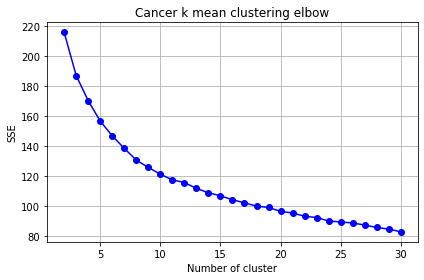

In [8]:
# cancer dataset
sse = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=id, n_jobs=-1).fit(cancerX)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'o-', color='b')
plt.title('Cancer k mean clustering elbow')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid()
plt.tight_layout()
plt.savefig(fig_path+'cancer_k_mean_elbow.png')

## Consumer Dataset Elbow Method

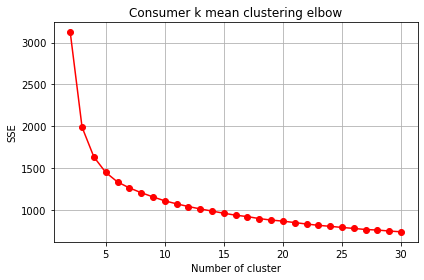

In [9]:
# consumer dataset
sse_consumer = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=id, n_jobs=-1).fit(consumerX)
    sse_consumer[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse_consumer.keys()), list(sse_consumer.values()), 'o-', color='r')
plt.title('Consumer k mean clustering elbow')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid()
plt.tight_layout()
plt.savefig(fig_path+'consumer_k_mean_elbow.png')

## Check if the clusters align with the classes

In [11]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=500, random_state=id, n_jobs=-1).fit(cancerX)
accuracy_score(cancerY, kmeans.labels_)

0.9279437609841827

In [12]:
adjusted_mutual_info_score(cancerY, kmeans.labels_)

0.6225724776699423

In [13]:
# INTERESTING
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=500, random_state=id, n_jobs=-1).fit(consumerX)
accuracy_score(consumerY, kmeans.labels_)

0.7383538153758217

In [14]:
# INTERESTING
adjusted_mutual_info_score(consumerY, kmeans.labels_)

0.1708948137661451

## Silhuette and homogenity scores

For n_clusters=2, Silhouette Coeff is 0.38 homogeneity_score is 0.61
For n_clusters=3, Silhouette Coeff is 0.33 homogeneity_score is 0.59
For n_clusters=4, Silhouette Coeff is 0.32 homogeneity_score is 0.65
For n_clusters=5, Silhouette Coeff is 0.17 homogeneity_score is 0.68
For n_clusters=6, Silhouette Coeff is 0.15 homogeneity_score is 0.64
For n_clusters=7, Silhouette Coeff is 0.16 homogeneity_score is 0.71
For n_clusters=8, Silhouette Coeff is 0.15 homogeneity_score is 0.73
For n_clusters=9, Silhouette Coeff is 0.15 homogeneity_score is 0.76
For n_clusters=10, Silhouette Coeff is 0.15 homogeneity_score is 0.73
For n_clusters=11, Silhouette Coeff is 0.15 homogeneity_score is 0.75
For n_clusters=12, Silhouette Coeff is 0.14 homogeneity_score is 0.8
For n_clusters=13, Silhouette Coeff is 0.12 homogeneity_score is 0.76
For n_clusters=14, Silhouette Coeff is 0.13 homogeneity_score is 0.82
For n_clusters=15, Silhouette Coeff is 0.13 homogeneity_score is 0.76
For n_clusters=16, Silhouette

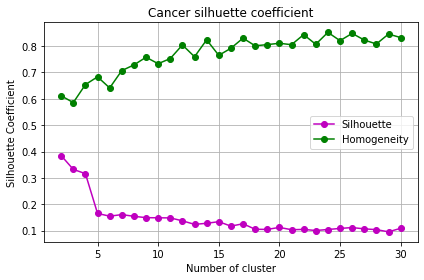

In [19]:
silh = {}
homog = {}
for cluster in range(2, 31):
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=500, random_state=id, n_jobs=-1).fit(cancerX)
    label = kmeans.labels_
    sil_coeff = silhouette_score(cancerX, label, metric='euclidean')
    homog_score = homogeneity_score(cancerY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, Silhouette Coeff is {}".format(cluster, round(sil_coeff,2)), "homogeneity_score is {}".format(round(homog_score,2)))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()), 'o-', color='m', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'o-', color='g', label="Homogeneity")
plt.title('Cancer silhuette coefficient')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(fig_path+'cancer_silhuette_coefficient.png')

For n_clusters=2, Silhouette Coeff is 0.33 homogeneity_score is 0.17
For n_clusters=3, Silhouette Coeff is 0.39 homogeneity_score is 0.15
For n_clusters=4, Silhouette Coeff is 0.4 homogeneity_score is 0.17
For n_clusters=5, Silhouette Coeff is 0.3 homogeneity_score is 0.21
For n_clusters=6, Silhouette Coeff is 0.27 homogeneity_score is 0.2
For n_clusters=7, Silhouette Coeff is 0.25 homogeneity_score is 0.21
For n_clusters=8, Silhouette Coeff is 0.25 homogeneity_score is 0.22
For n_clusters=9, Silhouette Coeff is 0.22 homogeneity_score is 0.23
For n_clusters=10, Silhouette Coeff is 0.22 homogeneity_score is 0.23
For n_clusters=11, Silhouette Coeff is 0.2 homogeneity_score is 0.24
For n_clusters=12, Silhouette Coeff is 0.2 homogeneity_score is 0.24
For n_clusters=13, Silhouette Coeff is 0.19 homogeneity_score is 0.24
For n_clusters=14, Silhouette Coeff is 0.19 homogeneity_score is 0.24
For n_clusters=15, Silhouette Coeff is 0.19 homogeneity_score is 0.24
For n_clusters=16, Silhouette Coe

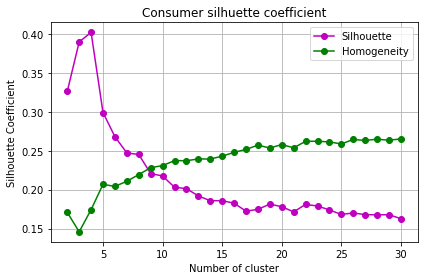

In [20]:
silh_consumer = {}
homog_consumer = {}
for cluster in range(2, 31):
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=500, random_state=id, n_jobs=-1).fit(consumerX)
    label = kmeans.labels_
    sil_coeff = silhouette_score(consumerX, label, metric='euclidean')
    homog_score = homogeneity_score(consumerY, (label+1))
    silh_consumer[cluster] = sil_coeff
    homog_consumer[cluster] = homog_score
    print("For n_clusters={}, Silhouette Coeff is {}".format(cluster, round(sil_coeff,2)), "homogeneity_score is {}".format(round(homog_score,2)))
plt.figure()
plt.plot(list(silh_consumer.keys()), list(silh_consumer.values()), 'o-', color='m', label="Silhouette")
plt.plot(list(homog_consumer.keys()), list(homog_consumer.values()), 'o-', color='g', label="Homogeneity")
plt.title('Consumer silhuette coefficient')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(fig_path+'consumer_silhuette_coefficient.png')

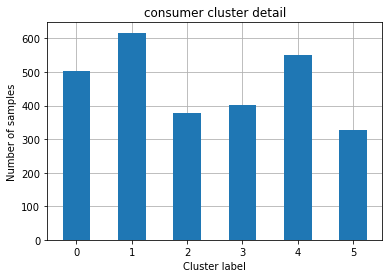

In [21]:
plt.figure()
plt.hist(kmeans.labels_, bins=np.arange(0, 6 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, 6))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('consumer cluster detail')
plt.grid()
# plt.savefig(fig_path+'kmeans_hist_2.png')

# Gaussian Mixture models - Expectation Maximization

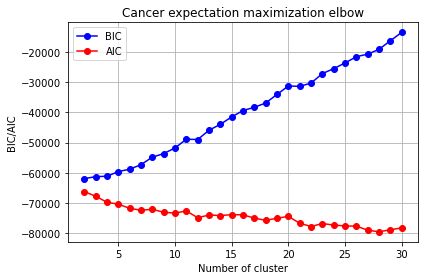

In [22]:
# cancer dataset
bic = {}
aic = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=500, random_state=id).fit(cancerX)
    bic[cluster] = gmm.bic(cancerX)
    aic[cluster] = gmm.aic(cancerX)
plt.figure()
plt.plot(list(bic.keys()), list(bic.values()), 'o-', color='b', label='BIC')
plt.plot(list(aic.keys()), list(aic.values()), 'o-', color='r', label='AIC')
plt.title('Cancer expectation maximization elbow')
plt.xlabel("Number of cluster")
plt.ylabel("BIC/AIC")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(fig_path+'cancer_expectation_maximization_elbow.png')

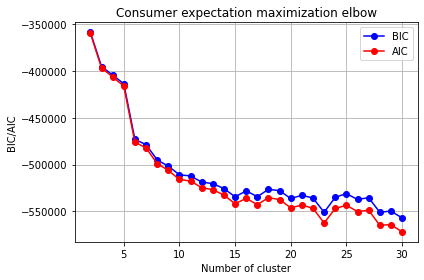

In [23]:
# consumer dataset
bic = {}
aic = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=500, random_state=id).fit(consumerX)
    bic[cluster] = gmm.bic(consumerX)
    aic[cluster] = gmm.aic(consumerX)
plt.figure()
plt.plot(list(bic.keys()), list(bic.values()), 'o-', color='b', label='BIC')
plt.plot(list(aic.keys()), list(aic.values()), 'o-', color='r', label='AIC')
plt.title('Consumer expectation maximization elbow')
plt.xlabel("Number of cluster")
plt.ylabel("BIC/AIC")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(fig_path+'consumer_expectation_maximization_elbow.png')

For n_clusters=2, Silhouette Coeff is 0.36 homogeneity_score is 0.67
For n_clusters=3, Silhouette Coeff is 0.31 homogeneity_score is 0.67
For n_clusters=4, Silhouette Coeff is 0.13 homogeneity_score is 0.54
For n_clusters=5, Silhouette Coeff is 0.14 homogeneity_score is 0.65
For n_clusters=6, Silhouette Coeff is 0.14 homogeneity_score is 0.73
For n_clusters=7, Silhouette Coeff is 0.13 homogeneity_score is 0.7
For n_clusters=8, Silhouette Coeff is 0.1 homogeneity_score is 0.65
For n_clusters=9, Silhouette Coeff is 0.12 homogeneity_score is 0.72
For n_clusters=10, Silhouette Coeff is 0.11 homogeneity_score is 0.81
For n_clusters=11, Silhouette Coeff is 0.13 homogeneity_score is 0.73
For n_clusters=12, Silhouette Coeff is 0.11 homogeneity_score is 0.79
For n_clusters=13, Silhouette Coeff is 0.1 homogeneity_score is 0.79
For n_clusters=14, Silhouette Coeff is 0.11 homogeneity_score is 0.79
For n_clusters=15, Silhouette Coeff is 0.11 homogeneity_score is 0.82
For n_clusters=16, Silhouette C

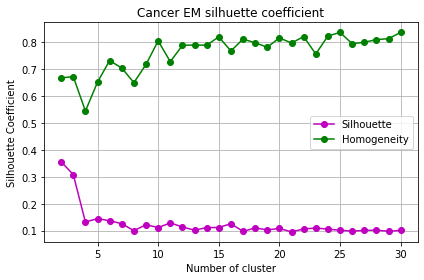

In [27]:
# cancer dataset score with EM
silh_EM = {}
homog_EM = {}
# log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=id, n_init=5).fit(cancerX)
    label = gmm.predict(cancerX)
    sil_coeff = silhouette_score(cancerX, label, metric='euclidean')
    homog_score = homogeneity_score(cancerY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
#     log_likelihood_EM[cluster] = gmm.score(cancerX)
    print("For n_clusters={}, Silhouette Coeff is {}".format(cluster, round(sil_coeff,2)), "homogeneity_score is {}".format(round(homog_score,2)))
#     print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()), 'o-', color='m', label="Silhouette")
plt.plot(list(homog_EM.keys()), list(homog_EM.values()), 'o-', color='g', label="Homogeneity")
plt.title('Cancer EM silhuette coefficient')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(fig_path+'cancer_EM_silhuette_coefficient.png')

For n_clusters=2, Silhouette Coeff is 0.1 homogeneity_score is 0.32
For n_clusters=3, Silhouette Coeff is 0.15 homogeneity_score is 0.26
For n_clusters=4, Silhouette Coeff is 0.13 homogeneity_score is 0.33
For n_clusters=5, Silhouette Coeff is 0.05 homogeneity_score is 0.33
For n_clusters=6, Silhouette Coeff is 0.04 homogeneity_score is 0.4
For n_clusters=7, Silhouette Coeff is 0.02 homogeneity_score is 0.4
For n_clusters=8, Silhouette Coeff is -0.01 homogeneity_score is 0.4
For n_clusters=9, Silhouette Coeff is -0.0 homogeneity_score is 0.4
For n_clusters=10, Silhouette Coeff is -0.02 homogeneity_score is 0.4
For n_clusters=11, Silhouette Coeff is -0.03 homogeneity_score is 0.4
For n_clusters=12, Silhouette Coeff is -0.02 homogeneity_score is 0.41
For n_clusters=13, Silhouette Coeff is -0.03 homogeneity_score is 0.45
For n_clusters=14, Silhouette Coeff is -0.03 homogeneity_score is 0.44
For n_clusters=15, Silhouette Coeff is -0.04 homogeneity_score is 0.45
For n_clusters=16, Silhouett

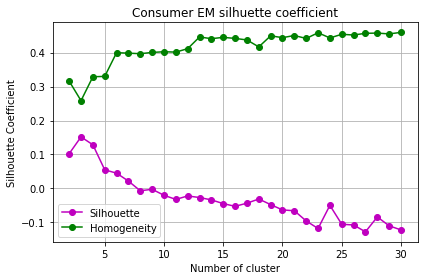

In [28]:
# Consumer dataset score with EM
silh_consumer_EM = {}
homog_consumer_EM = {}
# log_likelihood_consumer_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=id, n_init=5).fit(consumerX)
    label = gmm.predict(consumerX)
    sil_coeff = silhouette_score(consumerX, label, metric='euclidean')
    homog_score = homogeneity_score(consumerY, label)
    silh_consumer_EM[cluster] = sil_coeff
    homog_consumer_EM[cluster] = homog_score
#     log_likelihood_wine_EM[cluster] = gmm.score(consumerX)
    print("For n_clusters={}, Silhouette Coeff is {}".format(cluster, round(sil_coeff,2)), "homogeneity_score is {}".format(round(homog_score,2)))
#     print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_consummer_EM[cluster]))

plt.figure()
plt.plot(list(silh_consumer_EM.keys()), list(silh_consumer_EM.values()), 'o-', color='m', label="Silhouette")
plt.plot(list(homog_consumer_EM.keys()), list(homog_consumer_EM.values()), 'o-', color='g', label="Homogeneity")
plt.title('Consumer EM silhuette coefficient')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(fig_path+'consumer_EM_silhuette_coefficient.png')

## Compare classes on EM

In [29]:
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=id, n_init=5).fit(cancerX)
label = gmm.predict(cancerX)
accuracy_score(cancerY, label)

0.9420035149384886

In [30]:
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=id, n_init=5).fit(consumerX)
label = gmm.predict(consumerX)
accuracy_score(consumerY, label)

0.8032294941411832